# Week 5 - Dynamic Programming 1

In [23]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib 
# import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

### given demand function

In [24]:
def est_demand(price, 
               comp_price, 
               para = [-0.0564, 0.0133, 3.676]):
    """
    parameter from OLS (last week):
    price              -0.056444
    price_competitor    0.013317
    intercept           3.675965
    """
    demand = para[0]*price + para[1]*comp_price + para[2]
    demand = max(0,demand)
    return round(demand,3)

## get the revenue maximizing price by brute force for loop with prices 1..100

In [25]:
revenues = []
demands = []
best_rev = 0
best_p = 0

for p in tqdm(np.arange(1,100,0.5)):
    d = est_demand(price=p, 
               comp_price=50, 
               para = [-0.0564, 0.0133, 3.676])
    
    if d*p > best_rev:
        best_rev = d*p
        best_p = p
        
    demands.append(d)
    revenues.append(d*p)
        
print("best revenue: %.2f" % best_rev)
print("best price: %.2f" % best_p)

100%|██████████| 198/198 [00:00<00:00, 198392.78it/s]

best revenue: 83.55
best price: 38.50


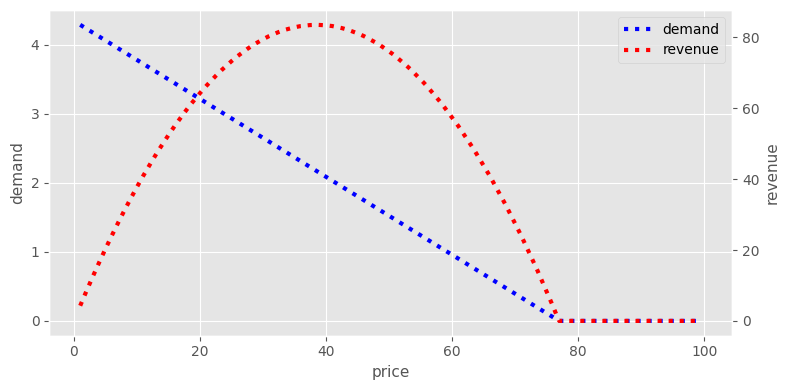

In [26]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(np.arange(1,100,0.5), demands, color='b', 
        linestyle='dotted', linewidth=3, label='demand')

ax_2 = ax.twinx()
ax_2.grid(False)
ax_2.plot(np.arange(1,100,0.5), revenues, color='r', 
        linestyle='dotted', linewidth=3, label='revenue')

ax_2.tick_params(axis="both", labelsize=10)
ax.tick_params(axis="both", labelsize=10)

# legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_2.get_legend_handles_labels()
ax_2.legend(lines + lines2, labels + labels2, loc=0)

ax.set_xlabel('price', size=11)
ax.set_ylabel("demand" , size=11)
ax_2.set_ylabel("revenue" , size=11)

ax.grid(True)
fig.tight_layout()

plt.show()

## task 1: Define the function opt_price(.) to analytically compute the optimal price.

In [27]:
def opt_price(comp_price, 
              para = [-0.0564, 0.0133, 3.676]):
    """
    parameter from OLS (last week):
    price              -0.056444
    price_competitor    0.013317
    intercept           3.675965
    """
    
    # optimal price calculation
    a = para[0]  # Beta_price
    b = para[1]  # Beta_price_competitor
    c = para[2]  # Beta_Intercept

    opt_price = (-b*comp_price - c)/(2*a)
    
    return round(opt_price,1)

In [28]:
opt_price(comp_price=50, para = [-0.0564, 0.0133, 3.676])

38.5

## task 2: Use opt_price(comp_price, para) to optimize the revenue in every time period. What is the total revenue you expect to make?
- capacity = 20
- consider 10 time periods for selling
- OLS parameter for price, competitor_price and intercept are [-0.0564, 0.0133, 3.676]
- assume constant competitor price of 50

In [29]:
capacity = 20
T_max = 10
rev = 0

for t in range(1, T_max+1):
    if capacity>0:
        p_opt = opt_price(comp_price=50)
        demand = est_demand(price=p_opt, comp_price=50)
        demand = min(capacity,demand)
        rev += p_opt * demand
        capacity -= demand
    else:
        p_opt = np.nan
        demand = np.nan
    print("t=%d, price=%.1f, demand=%.1f, revenue=%.2f, remaining_capacity=%.1f" \
          % (t,p_opt,demand,rev,capacity))
        

t=1, price=38.5, demand=2.2, revenue=83.55, remaining_capacity=17.8
t=2, price=38.5, demand=2.2, revenue=167.09, remaining_capacity=15.7
t=3, price=38.5, demand=2.2, revenue=250.63, remaining_capacity=13.5
t=4, price=38.5, demand=2.2, revenue=334.18, remaining_capacity=11.3
t=5, price=38.5, demand=2.2, revenue=417.73, remaining_capacity=9.1
t=6, price=38.5, demand=2.2, revenue=501.27, remaining_capacity=7.0
t=7, price=38.5, demand=2.2, revenue=584.82, remaining_capacity=4.8
t=8, price=38.5, demand=2.2, revenue=668.36, remaining_capacity=2.6
t=9, price=38.5, demand=2.2, revenue=751.90, remaining_capacity=0.5
t=10, price=38.5, demand=0.5, revenue=770.00, remaining_capacity=0.0


### What happens when we use a flat price of 42 in the above example?

In [37]:
capacity = 20
T_max = 10
rev = 0
p= 43

for t in range(1, T_max+1):
    if capacity>0:
        demand = est_demand(price=p, comp_price=50)
        demand = min(capacity,demand)
        rev += p * demand
        capacity -= demand
    else:
        p = np.nan
        demand = np.nan
    print("t=%d, price=%.1f, demand=%.1f, revenue=%.2f, remaining_capacity=%.1f" \
          % (t,p,demand,rev,capacity))

t=1, price=43.0, demand=1.9, revenue=82.39, remaining_capacity=18.1
t=2, price=43.0, demand=1.9, revenue=164.78, remaining_capacity=16.2
t=3, price=43.0, demand=1.9, revenue=247.16, remaining_capacity=14.3
t=4, price=43.0, demand=1.9, revenue=329.55, remaining_capacity=12.3
t=5, price=43.0, demand=1.9, revenue=411.94, remaining_capacity=10.4
t=6, price=43.0, demand=1.9, revenue=494.33, remaining_capacity=8.5
t=7, price=43.0, demand=1.9, revenue=576.72, remaining_capacity=6.6
t=8, price=43.0, demand=1.9, revenue=659.10, remaining_capacity=4.7
t=9, price=43.0, demand=1.9, revenue=741.49, remaining_capacity=2.8
t=10, price=43.0, demand=1.9, revenue=823.88, remaining_capacity=0.8


### => An optimal strategie consider also the future possible revenue not just the revenue in the current period.

## task 3: Define a function get_best_price_target_demand( target_demand, comp_price, para ) which return the price which results in the closest demand realization to the given target.

In [56]:
def get_best_price_target_demand(target_demand, 
                                 comp_price=50,
                                 para = [-0.0564, 0.0133, 3.676]):
    """
    given target demand, compute the best price to generate 
    demand as close as possible to the target_demand
    
    return: tupel of best price and the corresponding demand
    """

    best_p = 0
    best_realistic_demand = 0
    a, b, c = para
    best_p = 1/a * (target_demand - b*comp_price - c)
    
    best_p = max(0, best_p)

    demand = est_demand(price=best_p, comp_price=comp_price, para=para)
    
    best_realistic_demand= min(demand, target_demand)   
            
    return best_p, round(best_realistic_demand)

In [57]:
get_best_price_target_demand(target_demand=1)

(59.23758865248227, 1)

# task 4: Fill the value function matrix
- fill a dataframe df_V = pd.DataFrame(columns=['t','free_cap','V_t','price_t','demand_t'])
    - t = time periods to sell 
    - V_t = value of having free_cap remaining capacity at time period t, given we use price_t 
    - price_t = price to use in period t
    - demand_t = resulting demand in period t given price_t
- fill this dataframe matrix for all t=0,...,100 and free_cap=80,...,0
- V_0(x) = 0 for all free_capacity level x
- use OLS parameter for price, competitor_price and intercept are [-0.0564, 0.0133, 3.676]
    - assume you can at most create a demand of 5 per time period
    - assume competitor price of 50

In [64]:
df_V = pd.DataFrame(columns=['t','free_cap','V_t','price_t','demand_t'])

# fill the value function dataframe at the boundary condition t=0 
# at all capacity levels with value 0
for free_cap in range(0,81):
    df_V.loc[len(df_V)] = [0, free_cap, 0.0, 0.0, 0]
    
# DP recursion: for each period t and available capacity free_cap, evaluate candidate actions
for t in tqdm(range(1,101)):
    for free_cap in range(0,81):
        # consider candidate target demands from 0 up to min(5, free_cap)
        for demand in range(0, min(5, free_cap) + 1):
            best_price, best_demand = get_best_price_target_demand(target_demand=demand)

            # compute value at t-1
            if t-1 == 0:
                best_v = 0
            else : 
                v_prev_ts = df_V[df_V["t"] == t-1]
                v_with_remaining_cap = v_prev_ts[v_prev_ts["free_cap"] == (free_cap - best_demand)]
                best_v = v_with_remaining_cap["V_t"].values[0]
            V_t = best_price * best_demand + best_v

            # append new entry to our V dataframe
            df_V.loc[len(df_V)] = [t, free_cap, V_t, best_price, best_demand]
df_V

100%|██████████| 100/100 [00:47<00:00,  2.10it/s]


100%|██████████| 100/100 [00:47<00:00,  2.10it/s]


,t,free_cap,V_t,price_t,demand_t
0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,1.0,0.000000,0.000000,0.0
2,0.0,2.0,0.000000,0.000000,0.0
3,0.0,3.0,0.000000,0.000000,0.0
4,0.0,4.0,0.000000,0.000000,0.0
...,...,...,...,...,...
47176,100.0,80.0,59.237589,59.237589,1.0
47177,100.0,80.0,83.014184,41.507092,2.0
47178,100.0,80.0,71.329787,23.776596,3.0
47179,100.0,80.0,24.184397,6.046099,4.0


## task 5: Define a function best_action(t, free_cap) which uses our dtaframe df_V to find the best price action at given time period and remaining capacity level

In [65]:
def best_action(t, free_cap):
    df_aux = df_V[ df_V.t== t ]
    df_aux = df_aux[ df_aux.free_cap== free_cap ]
    df_aux = df_aux[df_aux.V_t == df_aux.V_t.max()]
    # if multiple prices have the same value function, take the highest price
    if len(df_aux)>1 :
        df_aux = "ADD CODE HERE"
    print("best action at time t = %d and free capacity level = %d:" % (t,free_cap))
    print("\t price = %.1f" % df_aux.price_t.values[0])
    print("\t expected demand = %.1f" % df_aux.demand_t.values[0])
    print("\t value function = %.1f" % df_aux.V_t.values[0])
    display(df_aux)
    
    return df_aux.price_t.values[0]


best_action(t=10, free_cap=45)

best action at time t = 10 and free capacity level = 45:
	 price = 41.5
	 expected demand = 2.0
	 value function = 83.0


,t,free_cap,V_t,price_t,demand_t
4577,10.0,45.0,83.014184,41.507092,2.0


np.float64(41.50709219858157)

# task 6: Implement such a DP strategie in your pricing algorithm considering the piece-wise linear demand models from two weeks ago.